In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy.spatial
import functools

%matplotlib inline

In [2]:
### Kernel function generators
def linear_kernel(X1, X2):
    """
    Computes the linear kernel between two sets of vectors.
    Args:
        X1 - an n1xd matrix with vectors x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
    Returns:
        matrix of size n1xn2, with x1_i^T x2_j in position i,j
    """
    return np.dot(X1,np.transpose(X2))
 
def RBF_kernel(X1,X2,sigma):
    """
    Computes the RBF kernel between two sets of vectors   
    Args:
        X1 - an n1xd matrix with vectors x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
        sigma - the bandwidth (i.e. standard deviation) for the RBF/Gaussian kernel
    Returns:
        matrix of size n1xn2, with exp(-||x1_i-x2_j||^2/(2 sigma^2)) in position i,j
    """
    #TODO
    diff_mat = scipy.spatial.distance.cdist(X1,X2,'sqeuclidean')
    return np.exp(-(diff_mat)/(2*sigma**2))

def polynomial_kernel(X1, X2, offset, degree):
    """
    Computes the inhomogeneous polynomial kernel between two sets of vectors
    Args:
        X1 - an n1xd matrix with vectors x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
        offset, degree - two parameters for the kernel
    Returns:
        matrix of size n1xn2, with (offset + <x1_i,x2_j>)^degree in position i,j
    """
    #TODO
    return (offset+linear_kernel(X1, X2))**degree

In [3]:
X0= np.array([[-4],[-1],[0],[2]])
linear_kernel(X0,X0)

array([[16,  4,  0, -8],
       [ 4,  1,  0, -2],
       [ 0,  0,  0,  0],
       [-8, -2,  0,  4]])

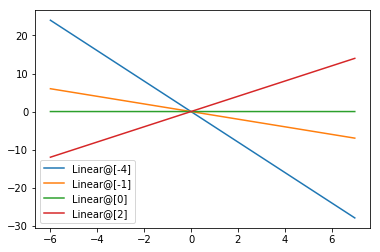

In [4]:
# PLot kernel machine functions

plot_step = .01
xpts = np.arange(-6.0, 7, plot_step).reshape(-1,1)
prototypes = np.array([-4,-1,0,2]).reshape(-1,1)

# Linear kernel
y = linear_kernel(prototypes, xpts)
y_RBF = RBF_kernel(prototypes,xpts,1)
y_poly = polynomial_kernel(prototypes,xpts,1,3)
for i in range(len(prototypes)):
    label = "Linear@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.show() 
 
 

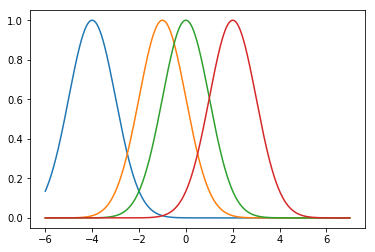

In [5]:
for i in range(len(prototypes)):
    label = "RBF@"+str(prototypes[i,:])
    plt.plot(xpts, y_RBF[i,:], label=label)

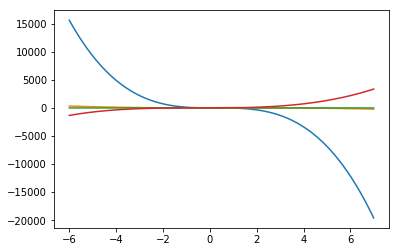

In [6]:
for i in range(len(prototypes)):
    label = "Poly@"+str(prototypes[i,:])
    plt.plot(xpts, y_poly[i,:], label=label)

In [7]:
class Kernel_Machine(object):
    def __init__(self, kernel, prototype_points, weights):
        """
        Args:
            kernel(X1,X2) - a function return the cross-kernel matrix between rows of X1 and rows of X2 for kernel k
            prototype_points - an Rxd matrix with rows mu_1,...,mu_R
            weights - a vector of length R with entries w_1,...,w_R
        """

        self.kernel = kernel
        self.prototype_points = prototype_points
        self.weights = weights
        
    def predict(self, X):
        """
        Evaluates the kernel machine on the points given by the rows of X
        Args:
            X - an nxd matrix with inputs x_1,...,x_n in the rows
        Returns:
            Vector of kernel machine evaluations on the n points in X.  Specifically, jth entry of return vector is
                Sum_{i=1}^R w_i k(x_j, mu_i)
        """
        # TODO
        K = self.kernel(X,self.prototype_points)
        return np.dot(K,self.weights)

In [8]:
from functools import partial
prototype_points = np.array([-1,0,1]).reshape(-1,1)
weights = np.array([1,-1,1]).reshape(-1,1)
x=np.array([-4,-1,0,2]).reshape(-1,1)
k = partial(RBF_kernel,sigma=1)
machine = Kernel_Machine(k,prototype_points,weights)
machine.predict(x)

array([[0.01077726],
       [0.52880462],
       [0.21306132],
       [0.48230437]])

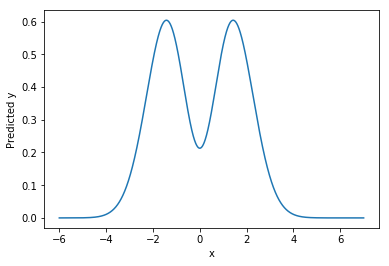

In [9]:
plot_step = .001
xpts = np.arange(-6.0, 7, plot_step).reshape(-1,1)
plt.plot(xpts, machine.predict(xpts), label=label)
plt.xlabel('x')
plt.ylabel('Predicted y')
plt.show()

Load train & test data; Convert to column vectors so it generalizes well to data in higher dimensions.

In [10]:
data_train,data_test = np.loadtxt("krr-train.txt"),np.loadtxt("krr-test.txt")
x_train, y_train = data_train[:,0].reshape(-1,1),data_train[:,1].reshape(-1,1)
x_test, y_test = data_test[:,0].reshape(-1,1),data_test[:,1].reshape(-1,1)

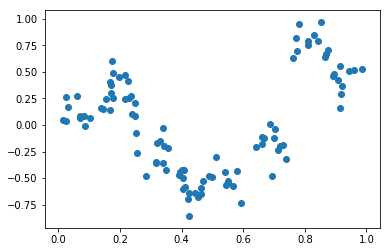

In [11]:
plt.scatter(x_train,y_train)

In [12]:
def train_kernel_ridge_regression(X, y, kernel, l2reg):
    # TODO
    K = kernel(X, X)
    dim_K = K.shape[0]
    alpha = np.linalg.inv((np.identity(dim_K)*l2reg+K)).dot(y)
    return Kernel_Machine(kernel, X, alpha)

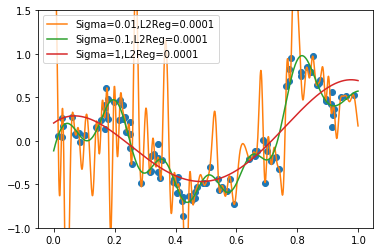

In [13]:
plot_step = .001
xpts = np.arange(0 ,1, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
l2reg = 0.0001
for sigma in [.01,0.1,1]:
    k = functools.partial(RBF_kernel, sigma=sigma)
    f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
    label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
    plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.5)
plt.show()

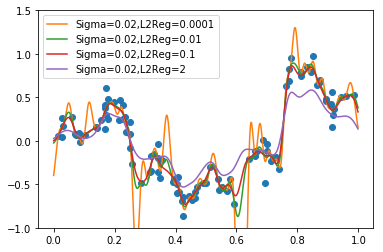

In [14]:
plot_step = .001
xpts = np.arange(0 , 1, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
sigma= 0.02
l2regs= [.0001,.01,0.1,2]
for l2reg in l2regs:
    k = functools.partial(RBF_kernel, sigma=sigma)
    f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
    label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
    plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.5)
plt.show()

In [15]:
from sklearn.base import BaseEstimator, RegressorMixin, ClassifierMixin

class KernelRidgeRegression(BaseEstimator, RegressorMixin):  
    """sklearn wrapper for our kernel ridge regression"""
     
    def __init__(self, kernel="RBF", sigma=1, degree=2, offset=1, l2reg=1):        
        self.kernel = kernel
        self.sigma = sigma
        self.degree = degree
        self.offset = offset
        self.l2reg = l2reg 

    def fit(self, X, y=None):
        """
        This should fit classifier. All the "work" should be done here.
        """
        if (self.kernel == "linear"):
            self.k = linear_kernel
        elif (self.kernel == "RBF"):
            self.k = functools.partial(RBF_kernel, sigma=self.sigma)
        elif (self.kernel == "polynomial"):
            self.k = functools.partial(polynomial_kernel, offset=self.offset, degree=self.degree)
        else:
            raise ValueError('Unrecognized kernel type requested.')
        
        self.kernel_machine_ = train_kernel_ridge_regression(X, y, self.k, self.l2reg)

        return self

    def predict(self, X, y=None):
        try:
            getattr(self, "kernel_machine_")
        except AttributeError:
            raise RuntimeError("You must train classifer before predicting data!")

        return(self.kernel_machine_.predict(X))

    def score(self, X, y=None):
        # get the average square error
        return(((self.predict(X)-y)**2).mean()) 

In [16]:
from sklearn.model_selection import GridSearchCV,PredefinedSplit
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error,make_scorer
import pandas as pd
    
test_fold = [-1]*len(x_train) + [0]*len(x_test)   #0 corresponds to test, -1 to train
predefined_split = PredefinedSplit(test_fold=test_fold)

In [17]:
np.exp2(-np.arange(-10,20,1))

array([1.02400000e+03, 5.12000000e+02, 2.56000000e+02, 1.28000000e+02,
       6.40000000e+01, 3.20000000e+01, 1.60000000e+01, 8.00000000e+00,
       4.00000000e+00, 2.00000000e+00, 1.00000000e+00, 5.00000000e-01,
       2.50000000e-01, 1.25000000e-01, 6.25000000e-02, 3.12500000e-02,
       1.56250000e-02, 7.81250000e-03, 3.90625000e-03, 1.95312500e-03,
       9.76562500e-04, 4.88281250e-04, 2.44140625e-04, 1.22070312e-04,
       6.10351562e-05, 3.05175781e-05, 1.52587891e-05, 7.62939453e-06,
       3.81469727e-06, 1.90734863e-06])

In [45]:
param_grid = [{'kernel': ['RBF'],'sigma':[0.01,0.05,0.1,0.5], 'l2reg': [0.05,0.1,0.5,1]},
              {'kernel':['polynomial'],'offset':[0.1,1,10], 'degree':[5,6,7],'l2reg':[0.001,0.01,0.1] },
              {'kernel':['linear'],'l2reg': [1000,500,100,50,10,5,1,0.5]}]
kernel_ridge_regression_estimator = KernelRidgeRegression()
grid = GridSearchCV(kernel_ridge_regression_estimator, 
                    param_grid,
                    cv = predefined_split,
                    scoring = make_scorer(mean_squared_error,greater_is_better = False)
                  # n_jobs = -1  #should allow parallelism, but crashes Python on my machine
                   )
grid.fit(np.vstack((x_train,x_test)),np.vstack((y_train,y_test))) 

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
       error_score='raise-deprecating',
       estimator=KernelRidgeRegression(degree=2, kernel='RBF', l2reg=1, offset=1, sigma=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kernel': ['RBF'], 'sigma': [0.01, 0.05, 0.1, 0.5], 'l2reg': [0.05, 0.1, 0.5, 1]}, {'kernel': ['polynomial'], 'offset': [0.1, 1, 10], 'degree': [5, 6, 7], 'l2reg': [0.001, 0.01, 0.1]}, {'kernel': ['linear'], 'l2reg': [1000, 500, 100, 50, 10, 5, 1, 0.5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)

In [46]:
pd.set_option('display.max_rows', 20)
df = pd.DataFrame(grid.cv_results_)
# Flip sign of score back, because GridSearchCV likes to maximize,
# so it flips the sign of the score if "greater_is_better=FALSE"
df['mean_test_score'] = -df['mean_test_score']
df['mean_train_score'] = -df['mean_train_score']
cols_to_keep = ["param_degree", "param_kernel","param_l2reg" ,"param_offset","param_sigma",
        "mean_test_score","mean_train_score"]
df_toshow = df[cols_to_keep].fillna('-')
df_toshow.sort_values(by=["mean_test_score"])

/Users/nyutianlong/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/nyutianlong/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/nyutianlong/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


,param_degree,param_kernel,param_l2reg,param_offset,param_sigma,mean_test_score,mean_train_score
9,-,RBF,0.50,-,0.05,0.013975,0.014918
5,-,RBF,0.10,-,0.05,0.015176,0.012190
13,-,RBF,1.00,-,0.05,0.015450,0.017943
1,-,RBF,0.05,-,0.05,0.016193,0.011565
0,-,RBF,0.05,-,0.01,0.018616,0.004931
4,-,RBF,0.10,-,0.01,0.018695,0.005903
2,-,RBF,0.05,-,0.1,0.020828,0.022830
6,-,RBF,0.10,-,0.1,0.022318,0.024147
8,-,RBF,0.50,-,0.01,0.023132,0.012929
10,-,RBF,0.50,-,0.1,0.026609,0.028110


In [48]:
# Can be a more convenient way to look at the table
import qgrid 
#qgrid.nbinstall(overwrite=True)  # copies javascript dependencies to your /nbextensions folderd_toshow = df[show].fillna('-')
qgrid.show_grid(df_toshow)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

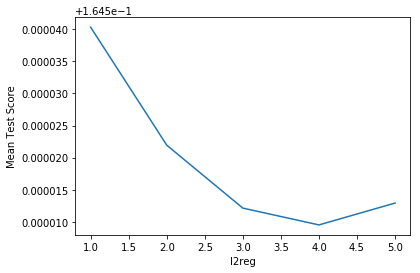

In [21]:
l=[]
l2regs=[1,2,3,4,5]
for l2reg in l2regs:
    linear_kernel_k = KernelRidgeRegression(kernel='linear',l2reg=l2reg)
    linear_kernel_k.fit(x_train,y_train)
    score=linear_kernel_k.score(x_test,y_test)
    l.append(score)
plt.plot(l2regs, l,)
plt.xlabel('l2reg')
plt.ylabel('Mean Test Score')
plt.show()

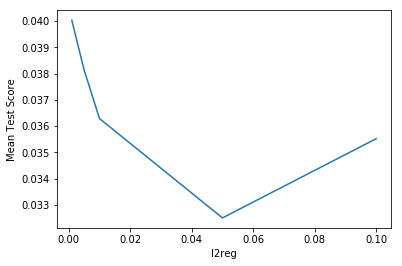

In [22]:
l=[]
l2regs=[0.001,0.005,0.01,0.05,0.1]
for l2reg in l2regs:
    poly_kernel_k = KernelRidgeRegression(kernel='polynomial',degree=6,offset=2,l2reg=l2reg)
    poly_kernel_k.fit(x_train,y_train)
    score=poly_kernel_k.score(x_test,y_test)
    l.append(score)
plt.plot(l2regs, l,)
plt.xlabel('l2reg')
plt.ylabel('Mean Test Score')
plt.show()

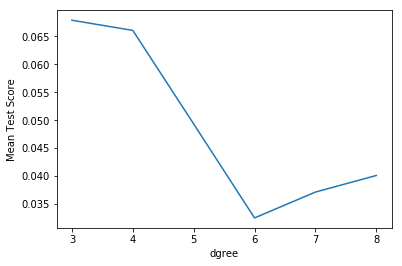

In [23]:
l=[]
degrees=[3,4,5,6,7,8]
for degree in degrees:
    poly_kernel_k = KernelRidgeRegression(kernel='polynomial',degree=degree,offset=2,l2reg=0.05)
    poly_kernel_k.fit(x_train,y_train)
    score=poly_kernel_k.score(x_test,y_test)
    l.append(score)
plt.plot(degrees, l,)
plt.xlabel('dgree')
plt.ylabel('Mean Test Score')
plt.show()

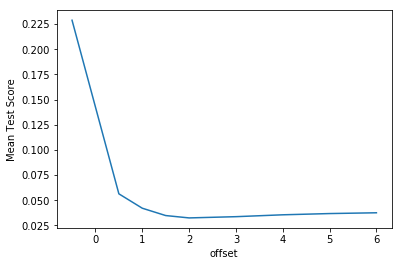

In [24]:
l=[]
offsets=[-0.5,0.5,1,1.5,2,3,4,5,6]
for offset in offsets:
    poly_kernel_k = KernelRidgeRegression(kernel='polynomial',degree=6,offset=offset,l2reg=0.05)
    poly_kernel_k.fit(x_train,y_train)
    score=poly_kernel_k.score(x_test,y_test)
    l.append(score)
plt.plot(offsets, l)
plt.xlabel('offset')
plt.ylabel('Mean Test Score')
plt.show()

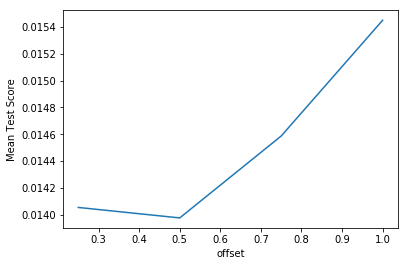

In [25]:
l=[]
l2regs=[0.25,0.5,0.75,1]
for l2reg in l2regs:
    poly_kernel_k = KernelRidgeRegression(kernel='RBF',sigma=0.05,l2reg=l2reg)
    poly_kernel_k.fit(x_train,y_train)
    score=poly_kernel_k.score(x_test,y_test)
    l.append(score)
plt.plot(l2regs, l)
plt.xlabel('offset')
plt.ylabel('Mean Test Score')
plt.show()

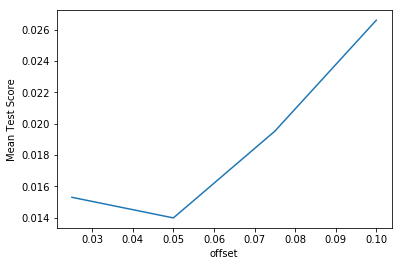

In [26]:
l=[]
sigmas=[0.025,0.05,0.075,0.1]
for sigma in sigmas:
    poly_kernel_k = KernelRidgeRegression(kernel='RBF',sigma=sigma,l2reg=0.5)
    poly_kernel_k.fit(x_train,y_train)
    score=poly_kernel_k.score(x_test,y_test)
    l.append(score)
plt.plot(sigmas, l)
plt.xlabel('offset')
plt.ylabel('Mean Test Score')
plt.show()

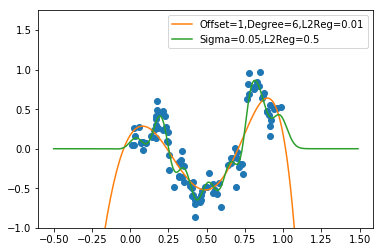

In [49]:
## Plot the best polynomial and RBF fits you found
plot_step = .01
xpts = np.arange(-.5 , 1.5, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
#Plot best polynomial fit
offset= 1
degree = 6
l2reg = 0.01
k = functools.partial(polynomial_kernel, offset=offset, degree=degree)
f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
label = "Offset="+str(offset)+",Degree="+str(degree)+",L2Reg="+str(l2reg)
plt.plot(xpts, f.predict(xpts), label=label)
#Plot best RBF fit
sigma = 0.05
l2reg= 0.5
k = functools.partial(RBF_kernel, sigma=sigma)
f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.75)
plt.show()

In [80]:
from sklearn.linear_model import ElasticNet
br = ElasticNet(alpha=0.1)
br.fit(x_train,y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [81]:
((br.predict(x_test)-y_test)**2).mean()

0.8874862688258547

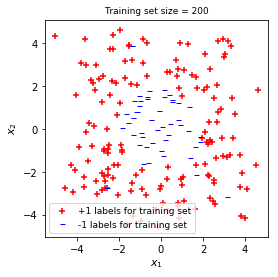

In [33]:
# Load and plot the SVM data
#load the training and test sets
data_train,data_test = np.loadtxt("svm-train.txt"),np.loadtxt("svm-test.txt")
x_train, y_train = data_train[:,0:2], data_train[:,2].reshape(-1,1)
x_test, y_test = data_test[:,0:2], data_test[:,2].reshape(-1,1)

#determine predictions for the training set
yplus = np.ma.masked_where(y_train[:,0]<=0, y_train[:,0])
xplus = x_train[~np.array(yplus.mask)]
yminus = np.ma.masked_where(y_train[:,0]>0, y_train[:,0])
xminus = x_train[~np.array(yminus.mask)]

#plot the predictions for the training set
figsize = plt.figaspect(1)
f, (ax) = plt.subplots(1, 1, figsize=figsize) 

pluses = ax.scatter (xplus[:,0], xplus[:,1], marker='+', c='r', label = '+1 labels for training set')
minuses = ax.scatter (xminus[:,0], xminus[:,1], marker=r'$-$', c='b', label = '-1 labels for training set')

ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('Training set size = %s'% len(data_train), fontsize=9)  
ax.axis('tight')
ax.legend(handles=[pluses, minuses], fontsize=9)
plt.show()

In [54]:
# Code to help plot the decision regions
# (Note: This ode isn't necessarily entirely appropriate for the questions asked. So think about what you are doing.)
 
sigma=1
k = functools.partial(RBF_kernel, sigma=sigma)
f = train_soft_svm(x_train, y_train, k, ...)

#determine the decision regions for the predictions
x1_min = min(x_test[:,0])
x1_max= max(x_test[:,0])
x2_min = min(x_test[:,1])
x2_max= max(x_test[:,1])
h=0.1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

Z = f.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#determine the predictions for the test set
y_bar = f.predict (x_test) 
yplus = np.ma.masked_where(y_bar<=0, y_bar)
xplus = x_test[~np.array(yplus.mask)]
yminus = np.ma.masked_where(y_bar>0, y_bar)
xminus = x_test[~np.array(yminus.mask)]

#plot the learned boundary and the predictions for the test set
figsize = plt.figaspect(1)
f, (ax) = plt.subplots(1, 1, figsize=figsize) 
decision =ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
pluses = ax.scatter (xplus[:,0], xplus[:,1], marker='+', c='b', label = '+1 prediction for test set')
minuses = ax.scatter (xminus[:,0], xminus[:,1], marker=r'$-$', c='b', label = '-1 prediction for test set')
ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('SVM with RBF Kernel: training set size = %s'% len(data_train), fontsize=9)  
ax.axis('tight')
ax.legend(handles=[pluses, minuses], fontsize=9)
plt.show()

NameError: name 'train_soft_svm' is not defined